Suppose:


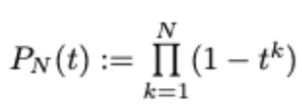
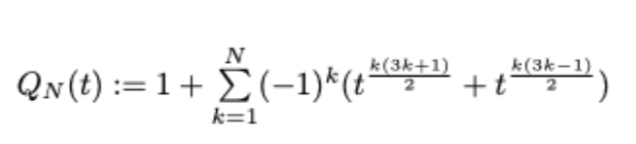


We wannna test hypothesis, that:

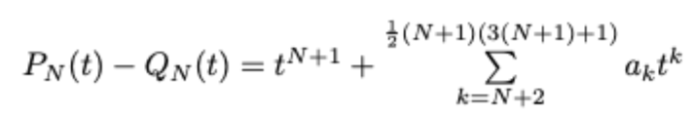

i.e. P_N(t) - Q_N(t) is a polynom of at least N+1 deegree, and coefficient that belong to t^N+1 is equal to 1.
We will create a functions that return coefficients for P_N(t) and Q_N(t), then we will substract this results and find the first index with non-zero element, if hypothesis is true, than it always has index N+1

First, we create function that create a polynom of P_N(t) as a vector of N(N+1)/2 + 1 coordinates

In [56]:
import numpy as np
import matplotlib.pyplot as plt
def InitialPolynom_P(N):
    p=(1,-1)
    for i in range(2,N+1):
        q=np.zeros(i+1,dtype=int)
        q[0]=1
        q[i]=-1
        q=tuple(q)
        p=np.polymul(p,q)
    return p



Note,that Q_N(t) has a N(3N+1)/2 + 1 coordinates, then, we will write a polynomial P_N(t) as a vector of N(3N+1)/2 + 1 coordinates, where all coefficieents after then N(N+1)/2 is equal to 0.

In [57]:
def Polynom_P(N):
  Z = N*N
  A = np.zeros(Z)
  B = InitialPolynom_P(N)
  return np.concatenate([B,A])

Creating Polynom Q_N(t) is much more easier

In [74]:
def Polynom_Q(N):
  D = ((N-1)*(3*(N-1)+1))/2 +1
  
  A = np.zeros(int(D))
  
  A[0] = 1
  
  for i in range(1,N):
    A[int(i*(3*i+1)/2)] = (-1)**i
    A[int(i*(3*i-1)/2)] = (-1)**i
  return A



Now, we draw a plot: x axis is N, y axis is a minimum deegree that has polynom P_N - Q_N

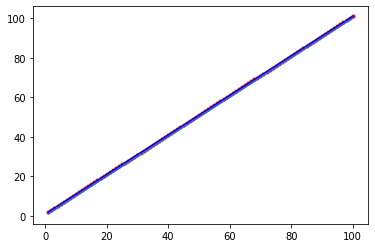

In [98]:
x = [i for i in range(1,101)]
y = []
for i in x:
  A = Polynom_P(i)
  B = Polynom_Q(i+1)
  C = np.polysub(A,B)
  y.append(np.where(C!=0)[0][0])
f, ax = plt.subplots(1)
ax.plot(x,y,"r.")
ax.plot(x,[k+1 for k in x],'blue')


So, by simulation hypothesis confirmed.
But how to prove it analytically...

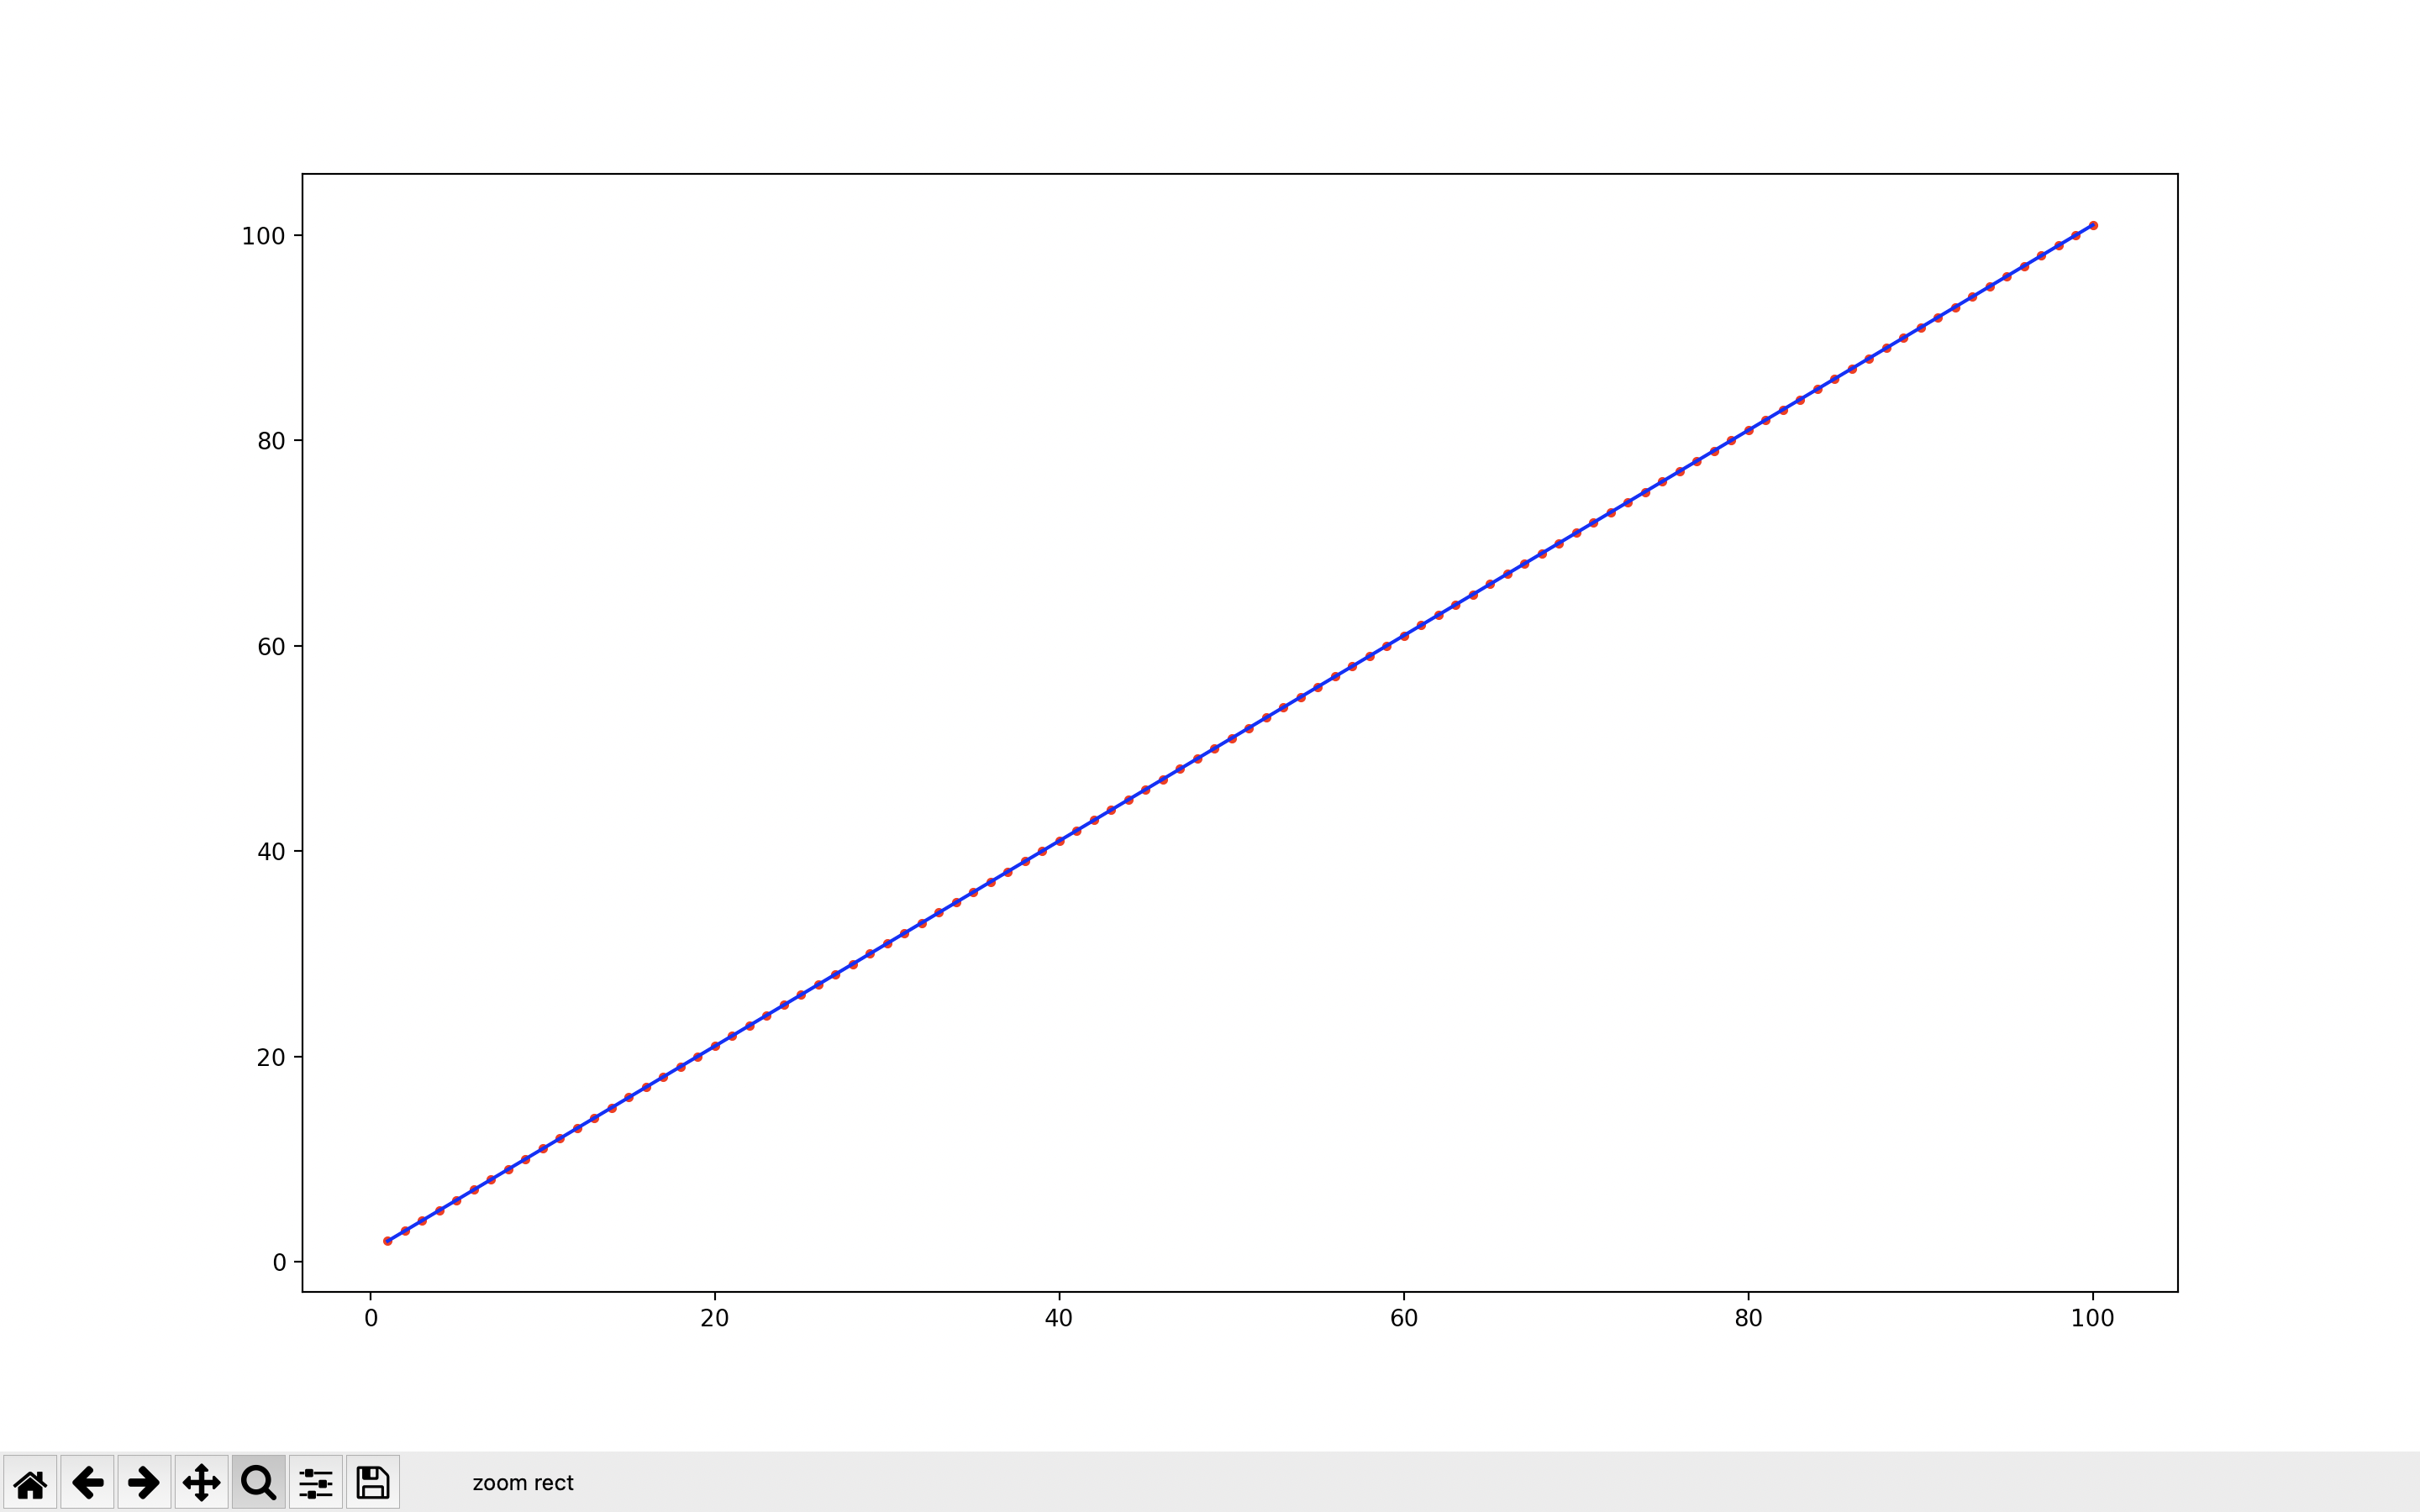